# Reconstructing The Stochastic Gates Research
---
### Geometry of Information Course - Milestone #2 

**Made by**:<br>
[Aviv Gelfand](https://www.linkedin.com/in/aviv-gelfand/v) <br>
[Jonathan Wiesenfeld](https://il.linkedin.com/in/jonathan-wiesenfeld)

**Lectured by:** [Prof. Ariel Jaffe](https://arieljaffe.huji.ac.il/) 


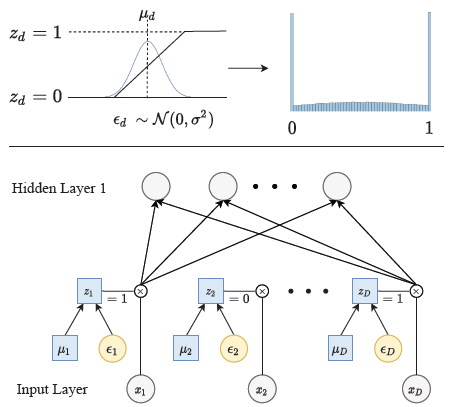
---

In this notebook, we apply the Stochastic Gates (STG) algorithm to both simulated and imported datasets to evaluate its efficacy in feature selection, through regression and classification tasks.

### Installing dependencies

In [3]:
# %pip install scikit-learn
# %pip install pandas
# %pip install seaborn
# %pip install torch
# %pip install stg 
# %pip install matplotlibv

# Regression and `sin_dataset`

We employ the STG algorithm, configured for regression tasks, with a neural network architecture comprising hidden layers with dimensions [500, 50, 10] and tanh activation. The model utilizes SGD optimization, a learning rate of 0.1, and feature selection enabled to discern the most relevant features influencing the regression outcome. The training process involves 3000 epochs with validation on a subset to monitor performance and prevent overfitting.

(1000, 200)
(1000, 1)


C:\Users\avivg\AppData\Local\Temp\ipykernel_17636\2032099238.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax[0].scatter(x=X_data[:, 0], y=X_data[:, 1], s=150, c=y_data.reshape(-1), alpha=0.4, cmap=plt.cm.get_cmap('RdYlBu'), )
C:\Users\avivg\AppData\Local\Temp\ipykernel_17636\2032099238.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax[1].scatter(x=X_data[:, 2], y=X_data[:, 3], s=150, c=y_data.reshape(-1), alpha=0.4, cmap=plt.cm.get_cmap('RdYlBu'), )


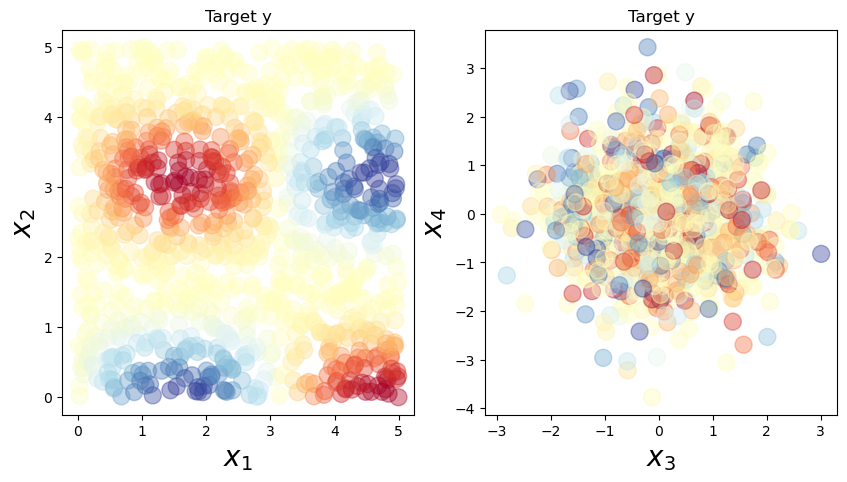

In [4]:
from stg import STG
import numpy as np
import torch
import scipy.stats # for creating a simple dataset
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

# Create a simple dataset
def create_sin_dataset(n,p):
    x1=5*(np.random.uniform(0,1,n)).reshape(-1,1)
    x2=5*(np.random.uniform(0,1,n)).reshape(-1,1)
    y=np.sin(x1)*np.cos(x2)**3
    relevant=np.hstack((x1,x2))
    noise_vector = scipy.stats.norm.rvs(loc=0, scale=1, size=[n,p-2])
    data = np.concatenate([relevant, noise_vector], axis=1)
    return data, y.astype(np.float32)

n_size = 1000 #Number of samples
p_size = 20   #Number of features
X_data, y_data=create_sin_dataset(n_size,p_size)
print(X_data.shape)
print(y_data.shape)

f, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(x=X_data[:, 0], y=X_data[:, 1], s=150, c=y_data.reshape(-1), alpha=0.4, cmap=plt.cm.get_cmap('RdYlBu'), )
ax[0].set_xlabel('$x_1$', fontsize=20)
ax[0].set_ylabel('$x_2$', fontsize=20)
ax[0].set_title('Target y')
ax[1].scatter(x=X_data[:, 2], y=X_data[:, 3], s=150, c=y_data.reshape(-1), alpha=0.4, cmap=plt.cm.get_cmap('RdYlBu'), )
ax[1].set_xlabel('$x_3$', fontsize=20)
ax[1].set_ylabel('$x_4$', fontsize=20)
ax[1].set_title('Target y')
plt.tick_params(labelsize=10)


It can be observed that the target y is a non-linear function of the $X_1$ and $X_2$ features only.

Visual representation of the target variable y and the model's regression output on the synthetic dataset highlights the model's predictive accuracy and the non-linear relationship captured between the selected features and the target variable. This approach not only demonstrates the STG algorithm's potential in handling complex, noisy data but also its capability in feature selection and enhancing model interoperability.

Epoch: 1000: loss=0.151286 valid_loss=0.102084
Epoch: 2000: loss=0.069501 valid_loss=0.019565
Epoch: 3000: loss=0.032519 valid_loss=0.003463
(1000, 1)


C:\Users\avivg\AppData\Local\Temp\ipykernel_17636\812126903.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax[0].scatter(x=X_data[:, 0], y=X_data[:, 1], s=150, c=y_data.reshape(-1), alpha=0.4, cmap=plt.cm.get_cmap('RdYlBu'), )
C:\Users\avivg\AppData\Local\Temp\ipykernel_17636\812126903.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax[1].scatter(x=X_data[:, 0], y=X_data[:, 1], s=150, c=y_pred.reshape(-1), alpha=0.4, cmap=plt.cm.get_cmap('RdYlBu'), )


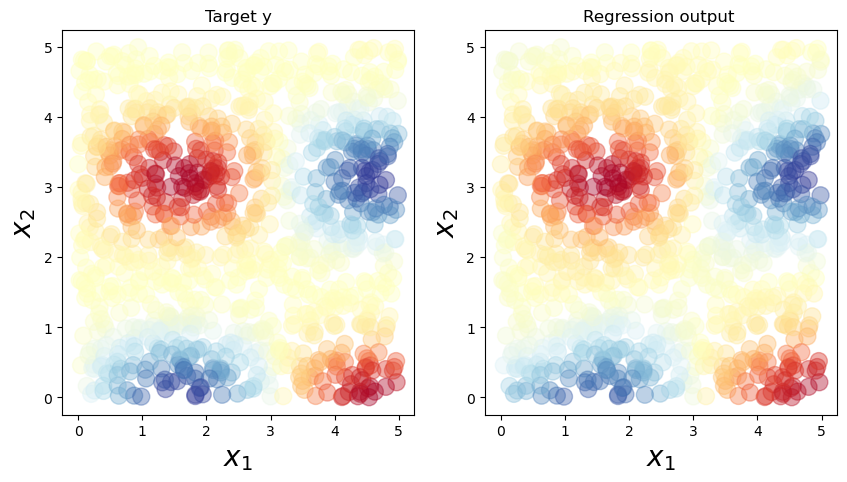

In [3]:

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.9)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8)

args_cuda = torch.cuda.is_available()
device = torch.device("cuda" if args_cuda else "cpu")
feature_selection = True
model = STG(task_type='regression',input_dim=X_train.shape[1], output_dim=1, hidden_dims=[500, 50, 10], activation='tanh',
    optimizer='SGD', learning_rate=0.1, batch_size=X_train.shape[0], feature_selection=feature_selection, sigma=0.5, lam=0.1, random_state=1, device=device)

model.fit(X_train, y_train, nr_epochs=3000, valid_X=X_valid, valid_y=y_valid, print_interval=1000)

import torch
tmp_loss = torch.nn.MSELoss()
tmp_loss(torch.Tensor(y_train), torch.Tensor(model.predict(X_train)))

tmp_loss(torch.Tensor(y_test), torch.Tensor(model.predict(X_test)))

model.get_gates(mode='prob')

model.get_gates(mode='raw')


## TESTING THE MODEL

y_pred=model.predict(X_data)

print(y_pred.shape)

f, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(x=X_data[:, 0], y=X_data[:, 1], s=150, c=y_data.reshape(-1), alpha=0.4, cmap=plt.cm.get_cmap('RdYlBu'), )
ax[0].set_xlabel('$x_1$', fontsize=20)
ax[0].set_ylabel('$x_2$', fontsize=20)
ax[0].set_title('Target y')
ax[1].scatter(x=X_data[:, 0], y=X_data[:, 1], s=150, c=y_pred.reshape(-1), alpha=0.4, cmap=plt.cm.get_cmap('RdYlBu'), )
ax[1].set_xlabel('$x_1$', fontsize=20)
ax[1].set_ylabel('$x_2$', fontsize=20)
ax[1].set_title('Regression output ')
plt.tick_params(labelsize=10)
plt.show()


p=5
fitting model
Epoch: 1000: loss=0.176037 valid_loss=0.150990
Epoch: 2000: loss=0.161264 valid_loss=0.151187
Epoch: 3000: loss=0.159763 valid_loss=0.151185
(1000, 1)
RMSE: 0.39245739579200745
plotting results


C:\Users\avivg\AppData\Local\Temp\ipykernel_17636\1211024337.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax[0].scatter(x=X_data[:, 0], y=X_data[:, 1], s=150, c=y_data.reshape(-1), alpha=0.4, cmap=plt.cm.get_cmap('RdYlBu'), )
C:\Users\avivg\AppData\Local\Temp\ipykernel_17636\1211024337.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax[1].scatter(x=X_data[:, 0], y=X_data[:, 1], s=150, c=y_pred.reshape(-1), alpha=0.4, cmap=plt.cm.get_cmap('RdYlBu'), )


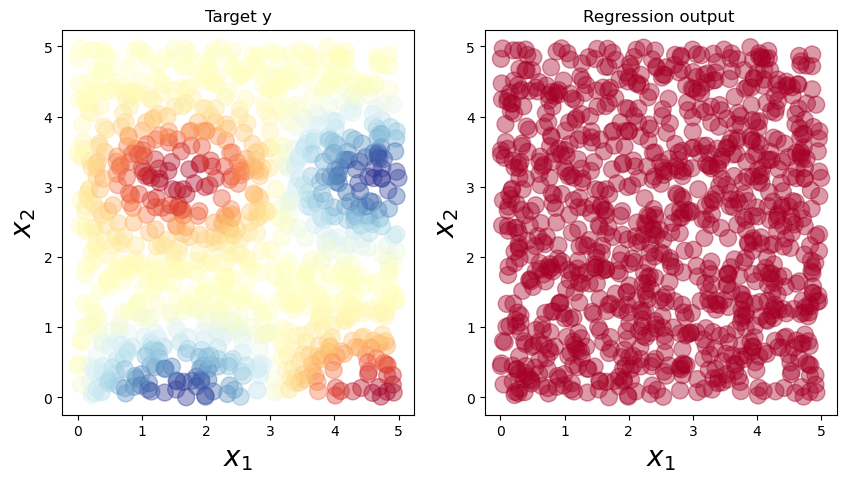

p=10
fitting model
Epoch: 1000: loss=0.112652 valid_loss=0.044519
Epoch: 2000: loss=0.041595 valid_loss=0.014373
Epoch: 3000: loss=0.031548 valid_loss=0.006592
(1000, 1)
RMSE: 0.08069074898958206
plotting results


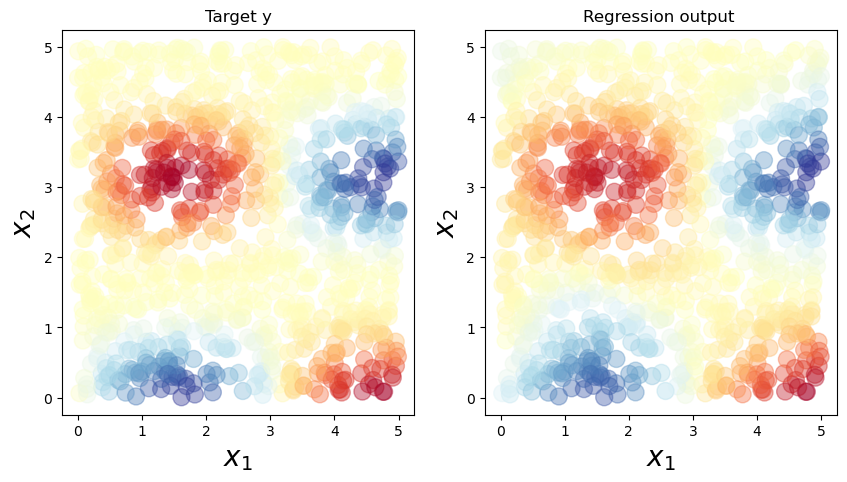

p=20
fitting model
Epoch: 1000: loss=0.126086 valid_loss=0.067120
Epoch: 2000: loss=0.092506 valid_loss=0.047968
Epoch: 3000: loss=0.035124 valid_loss=0.005290
(1000, 1)
RMSE: 0.07037021964788437
plotting results


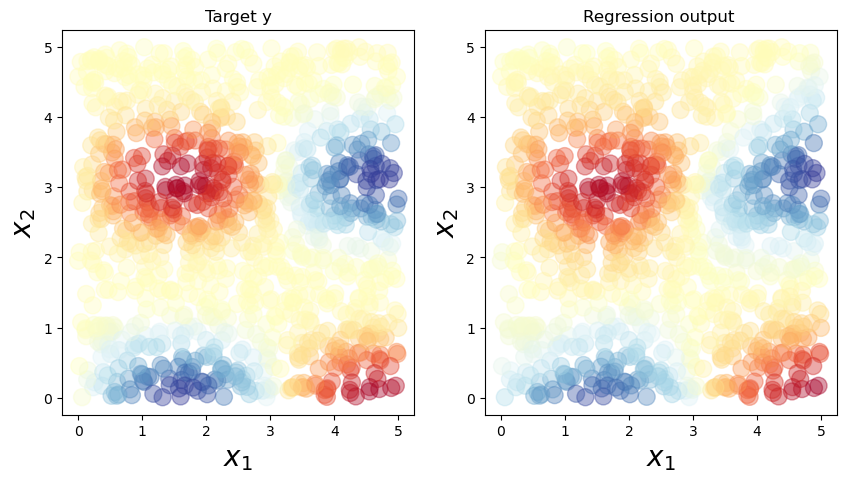

p=100
fitting model
Epoch: 1000: loss=0.187041 valid_loss=0.129812
Epoch: 2000: loss=0.116434 valid_loss=0.082593
Epoch: 3000: loss=0.105307 valid_loss=0.061500
(1000, 1)
RMSE: 0.15424585342407227
plotting results


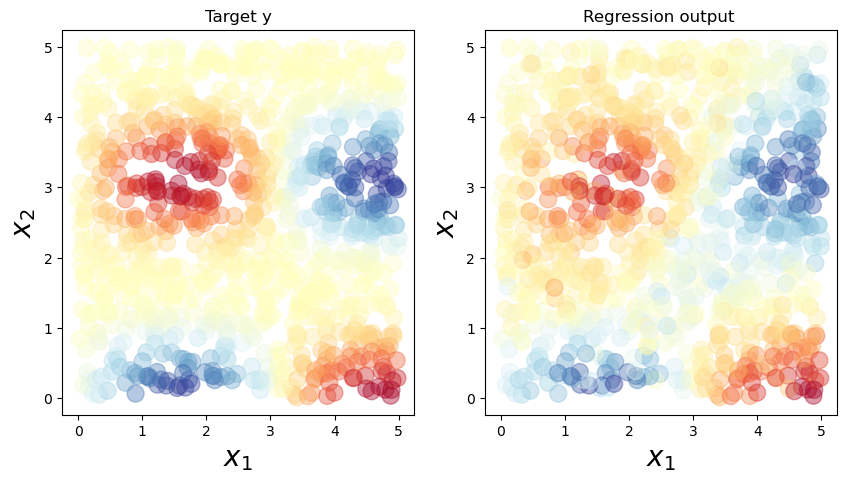

C:\Users\avivg\AppData\Local\Temp\ipykernel_17636\1211024337.py:67: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax[1].scatter(x=X_data[:, 0], y=X_data[:, 1], s=150, c=y_pred.reshape(-1), alpha=0.4, cmap=plt.cm.get_cmap('RdYlBu'), )


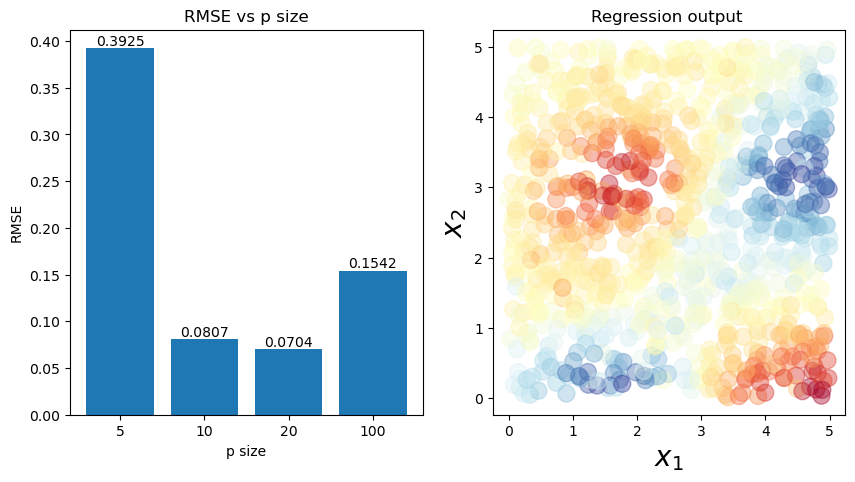

In [29]:
p_size_ls = [5, 10, 20, 100]
rmse_arr = []
for p in p_size_ls:
    print(f"p={p}")
    n_size = 1000  # Number of samples
    X_data, y_data = create_sin_dataset(n_size, p)
    # Rest of the code from the previous cell
    
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.9)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8)

    args_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if args_cuda else "cpu")
    feature_selection = True
    model = STG(task_type='regression',input_dim=X_train.shape[1], output_dim=1, hidden_dims=[500, 50, 10], activation='tanh',
        optimizer='SGD', learning_rate=0.1, batch_size=X_train.shape[0], feature_selection=feature_selection, sigma=0.5, lam=0.1, random_state=1, device=device)
    print("fitting model")
    model.fit(X_train, y_train, nr_epochs=3000, valid_X=X_valid, valid_y=y_valid, print_interval=1000)

    import torch
    tmp_loss = torch.nn.MSELoss()
    tmp_loss(torch.Tensor(y_train), torch.Tensor(model.predict(X_train)))

    tmp_loss(torch.Tensor(y_test), torch.Tensor(model.predict(X_test)))

    model.get_gates(mode='prob')

    model.get_gates(mode='raw')


    ## TESTING THE MODEL

    y_pred=model.predict(X_data)


    print(y_pred.shape)
    # print rmse
    print(f"RMSE: {np.sqrt(np.mean((y_pred - y_data)**2))}")
    rmse_arr.append(np.sqrt(np.mean((y_pred - y_data)**2)))
    print("plotting results")
    
    f, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].scatter(x=X_data[:, 0], y=X_data[:, 1], s=150, c=y_data.reshape(-1), alpha=0.4, cmap=plt.cm.get_cmap('RdYlBu'), )
    ax[0].set_xlabel('$x_1$', fontsize=20)
    ax[0].set_ylabel('$x_2$', fontsize=20)
    ax[0].set_title('Target y')
    ax[1].scatter(x=X_data[:, 0], y=X_data[:, 1], s=150, c=y_pred.reshape(-1), alpha=0.4, cmap=plt.cm.get_cmap('RdYlBu'), )
    ax[1].set_xlabel('$x_1$', fontsize=20)
    ax[1].set_ylabel('$x_2$', fontsize=20)
    ax[1].set_title('Regression output ')
    plt.tick_params(labelsize=10)
    plt.show();

f, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].bar(range(len(p_size_ls)), rmse_arr)
ax[0].set_xticks(range(len(p_size_ls)))
ax[0].set_xticklabels(p_size_ls)
ax[0].set_xlabel('p size')
ax[0].set_ylabel('RMSE')
ax[0].set_title('RMSE vs p size')

for i, v in enumerate(rmse_arr):
    ax[0].text(i, v, str(round(v, 4)), ha='center', va='bottom')

ax[1].scatter(x=X_data[:, 0], y=X_data[:, 1], s=150, c=y_pred.reshape(-1), alpha=0.4, cmap=plt.cm.get_cmap('RdYlBu'), )
ax[1].set_xlabel('$x_1$', fontsize=20)
ax[1].set_ylabel('$x_2$', fontsize=20)
ax[1].set_title('Regression output ')

plt.tick_params(labelsize=10)
plt.show()


As shown in the above plot, the model successfully managed predict the correct output.

In [4]:
# from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import torch
from sklearn.model_selection import train_test_split
from stg import STG  # Assuming this is your custom model import
import matplotlib.pyplot as plt
import os

# Classification

## UCI Madelon Dataset 

MADELON is an artificial dataset containing data points grouped in 32 clusters placed on the vertices of a five dimensional hypercube and randomly labeled +1 or -1. The five dimensions constitute 5 informative features. 15 linear combinations of those features were added to form a set of 20 (redundant) informative features. Based on those 20 features one must separate the examples into the 2 classes (corresponding to the +-1 labels). We added a number of distractor feature called 'probes' having no predictive power. The order of the features and patterns were randomized.

In [ ]:
madelon = pd.read_csv(path)
madelon['Class'] = madelon['Class'].map({1: 0, 2: 1})


In [41]:
madelon = pd.read_csv(path)
madelon['Class'] = madelon['Class'].map({1: 0, 2: 1})

madelon['Class'].value_counts()

# Split data into features and target
X = madelon.drop('Class', axis=1).to_numpy()
y = madelon['Class'].to_numpy()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define model parameters
args_cuda = torch.cuda.is_available()
device = torch.device("cuda" if args_cuda else "cpu")
feature_selection = True

# Initialize and fit the model
model = STG(task_type='classification',input_dim=X_train.shape[1],output_dim=2,hidden_dims=[500, 50, 10],
            activation='tanh',optimizer='SGD',learning_rate=0.1,batch_size=64,
            feature_selection=feature_selection,sigma=0.5,lam=0.1,random_state=1,device=device)

model.fit( X_train, y_train, nr_epochs=3000, valid_X=X_valid, valid_y=y_valid, print_interval=1000)

KeyboardInterrupt: 

In [28]:
# Load the MADELON dataset package
path = os.getcwd() + "\madelon.csv"
madelon = pd.read_csv(path)



# Convert DataFrames to numpy arrays
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

# X_train_np
# X_test_np 
# y_train_np
# y_test_np
# Plotting the results
y_pred_train = model.predict(X_train_np)
y_pred_test = model.predict(X_test_np)

# Calculate confusion matrices for both training and testing sets
y_train_flat = y_train_np.ravel()
y_pred_train_flat = y_pred_train.ravel()

# Define model parameters
args_cuda = torch.cuda.is_available()
device = torch.device("cuda" if args_cuda else "cpu")
feature_selection = True

# Initialize and fit the model
model = STG(task_type='classification',input_dim=X_train_np.shape[1],output_dim=1,hidden_dims=[500, 50, 10],
            activation='tanh',optimizer='SGD',learning_rate=0.1,batch_size=X_train_np.shape[0],
            feature_selection=feature_selection,sigma=0.5,lam=0.1,random_state=1,device=device)

model.fit(X_train_np, y_train_np, nr_epochs=3000, valid_X=X_test_np, valid_y=y_test_np, print_interval=1000)
# Evaluate the model
tmp_loss = torch.nn.MSELoss()
train_loss = tmp_loss(torch.Tensor(y_train_np), torch.Tensor(model.predict(X_train_np)))
test_loss = tmp_loss(torch.Tensor(y_test_np), torch.Tensor(model.predict(X_test_np)))

print(f"Train Loss: {train_loss.item()}")
print(f"Test Loss: {test_loss.item()}")
# Plot the confusion matrices
# Train
conf_matrix_train = confusion_matrix(y_train_flat, y_pred_train_flat)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Train Confusion Matrix')
plt.show()

# Test
y_test_flat = y_test_np.ravel()
y_pred_test_flat = y_pred_test.ravel()
conf_matrix_test = confusion_matrix(y_test_flat, y_pred_test_flat)

sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Test Confusion Matrix')

plt.show()


IndexError: Target 1 is out of bounds.

In [ ]:
# X_train_np
# X_test_np 
# y_train_np
# y_test_np
# Plotting the results
y_pred_train = model.predict(X_train_np)
y_pred_test = model.predict(X_test_np)

# Calculate confusion matrices for both training and testing sets
y_train_flat = y_train_np.ravel()
y_pred_train_flat = y_pred_train.ravel()

# Define model parameters
args_cuda = torch.cuda.is_available()
device = torch.device("cuda" if args_cuda else "cpu")
feature_selection = True

# Initialize and fit the model
model = STG(task_type='classification',input_dim=X_train_np.shape[1],output_dim=1,hidden_dims=[500, 50, 10],
            activation='tanh',optimizer='SGD',learning_rate=0.1,batch_size=X_train_np.shape[0],
            feature_selection=feature_selection,sigma=0.5,lam=0.1,random_state=1,device=device)

model.fit(X_train_np, y_train_np, nr_epochs=3000, valid_X=X_test_np, valid_y=y_test_np, print_interval=1000)
# Evaluate the model
tmp_loss = torch.nn.MSELoss()
train_loss = tmp_loss(torch.Tensor(y_train_np), torch.Tensor(model.predict(X_train_np)))
test_loss = tmp_loss(torch.Tensor(y_test_np), torch.Tensor(model.predict(X_test_np)))

print(f"Train Loss: {train_loss.item()}")
print(f"Test Loss: {test_loss.item()}")


In [6]:

# Define model parameters
args_cuda = torch.cuda.is_available()
device = torch.device("cuda" if args_cuda else "cpu")
feature_selection = True

# Initialize and fit the model
model = STG(task_type='classification',input_dim=X_train_np.shape[1],output_dim=1,hidden_dims=[500, 50, 10],
            activation='tanh',optimizer='SGD',learning_rate=0.1,batch_size=X_train_np.shape[0],
            feature_selection=feature_selection,sigma=0.5,lam=0.1,random_state=1,device=device)

model.fit(X_train_np, y_train_np, nr_epochs=3000, valid_X=X_test_np, valid_y=y_test_np, print_interval=1000)
# Evaluate the model
tmp_loss = torch.nn.MSELoss()
train_loss = tmp_loss(torch.Tensor(y_train_np), torch.Tensor(model.predict(X_train_np)))
test_loss = tmp_loss(torch.Tensor(y_test_np), torch.Tensor(model.predict(X_test_np)))

print(f"Train Loss: {train_loss.item()}")
print(f"Test Loss: {test_loss.item()}")


c:\Users\avivg\1My Code Scripts\GeometryOfInformation\.conda\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([2080])) that is different to the input size (torch.Size([2080, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\avivg\1My Code Scripts\GeometryOfInformation\.conda\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([520])) that is different to the input size (torch.Size([520, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1000: loss=0.333887 valid_loss=0.249970
Epoch: 2000: loss=0.333258 valid_loss=0.249969
Epoch: 3000: loss=0.332864 valid_loss=0.249974


## Two Moons Data Set


(1000,)
(1000, 20)
(1000, 20)
(1000,)


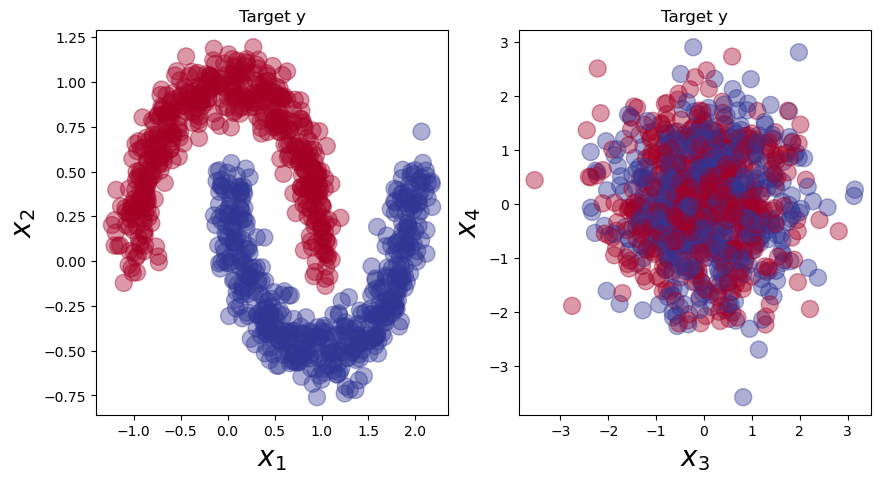

c:\Users\avivg\1My Code Scripts\GeometryOfInformation\.conda\lib\site-packages\torch\nn\modules\module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch: 1000: loss=0.277930 valid_loss=0.192868
Epoch: 2000: loss=0.225879 valid_loss=0.162461
Epoch: 3000: loss=0.068260 valid_loss=0.013376
Epoch: 4000: loss=0.062772 valid_loss=0.009344
Epoch: 5000: loss=0.066544 valid_loss=0.011177
Epoch: 6000: loss=0.060762 valid_loss=0.007496
[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 2.1546     1.6424322 -1.6190051 -1.6141644 -1.6210912 -1.6156664
 -1.6167022 -1.6171824 -1.6186913 -1.6180112 -1.611392  -1.61617
 -1.6168247 -1.6170818 -1.6158788 -1.6168811 -1.6138155 -1.6158236
 -1.6165388 -1.6208644]


In [14]:
from stg import STG
import numpy as np
import scipy.stats # for creating a simple dataset 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import torch

import numpy as np
import math
from sklearn.datasets import make_moons
from scipy.stats import norm


# Create a simple dataset
def create_twomoon_dataset(n, p):
    relevant, y = make_moons(n_samples=n, shuffle=True, noise=0.1, random_state=None)
    print(y.shape)
    noise_vector = norm.rvs(loc=0, scale=1, size=[n,p-2])
    data = np.concatenate([relevant, noise_vector], axis=1)
    print(data.shape)
    return data, y

n_size = 1000 #Number of samples
p_size = 20   #Number of features
X_data, y_data=create_twomoon_dataset(n_size,p_size)
print(X_data.shape)
print(y_data.shape)
f,ax = plt.subplots(1,2,figsize=(10,5))
        

ax[0].scatter(x=X_data[:,0], y=X_data[:,1], s=150, c=y_data.reshape(-1),alpha=0.4,cmap=plt.colormaps['RdYlBu'])
ax[0].set_xlabel('$x_1$',fontsize=20)
ax[0].set_ylabel('$x_2$',fontsize=20)
ax[0].set_title('Target y')
ax[1].scatter(x=X_data[:,2], y=X_data[:,3], s=150, c=y_data.reshape(-1),alpha=0.4,cmap=plt.colormaps['RdYlBu'])
ax[1].set_xlabel('$x_3$',fontsize=20)
ax[1].set_ylabel('$x_4$',fontsize=20)
ax[1].set_title('Target y')
plt.tick_params(labelsize=10)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.3)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8)


args_cuda = torch.cuda.is_available()
device = torch.device("cuda" if args_cuda else "cpu") 
feature_selection = True
model = STG(task_type='classification',input_dim=X_train.shape[1], output_dim=2, hidden_dims=[60, 20], activation='tanh',
    optimizer='SGD', learning_rate=0.1, batch_size=X_train.shape[0], feature_selection=feature_selection, sigma=0.5, lam=0.5, random_state=1, device=device) 

model.fit(X_train, y_train, nr_epochs=6000, valid_X=X_valid, valid_y=y_valid, print_interval=1000)

print(model.get_gates(mode='prob'))

print(model.get_gates(mode='raw') )


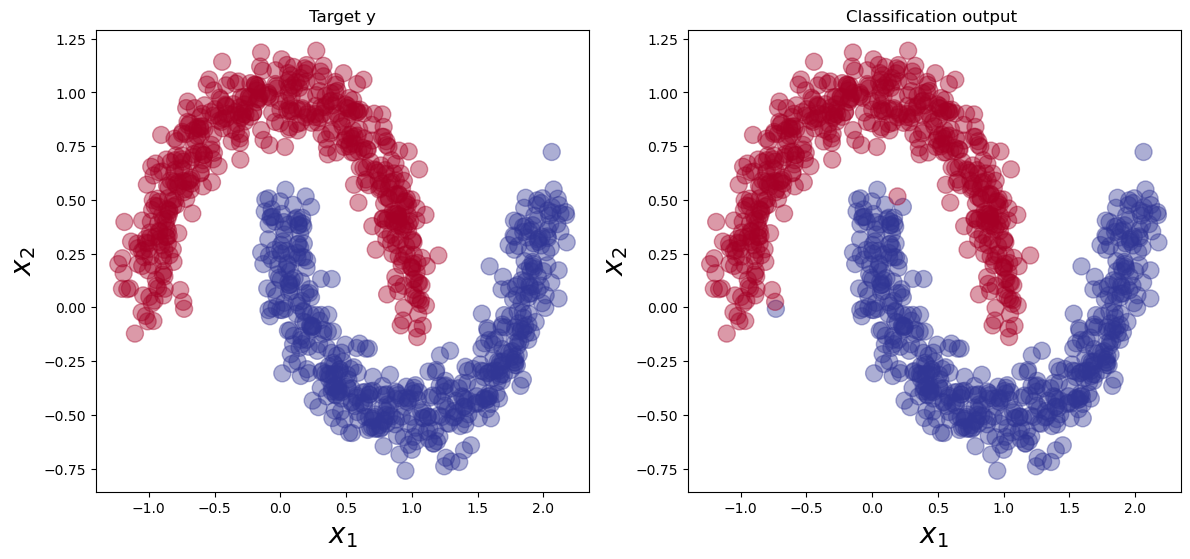

In [15]:
y_pred=model.predict(X_data)
import matplotlib.pyplot as plt
import matplotlib  # Make sure to import this

y_pred = model.predict(X_data)
f, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].scatter(x=X_data[:, 0], y=X_data[:, 1], s=150, c=y_data.reshape(-1), alpha=0.4, cmap=matplotlib.colormaps['RdYlBu'])
ax[0].set_xlabel('$x_1$', fontsize=20)
ax[0].set_ylabel('$x_2$', fontsize=20)
ax[0].set_title('Target y')
ax[1].scatter(x=X_data[:, 0], y=X_data[:, 1], s=150, c=y_pred.reshape(-1), alpha=0.4, cmap=matplotlib.colormaps['RdYlBu'])
ax[1].set_xlabel('$x_1$', fontsize=20)
ax[1].set_ylabel('$x_2$', fontsize=20)
ax[1].set_title('Classification output ')
plt.tick_params(labelsize=10)

### Confusion Matrix

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

cm = confusion_matrix(y_data, y_pred)
cm = cm / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, index=[0, 1], columns=[0, 1])
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'y_data' is not defined

In [ ]:

conf_matrix_train = confusion_matrix(y_train_flat, y_pred_train_flat)
# conf_matrix_test = confusion_matrix(y_test_np, y_pred_test)

# Plot confusion matrix for training set
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Plot confusion matrix for testing set
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Testing Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

In [25]:
madelon.shape
X_data.shape

(1000, 20)

# Results

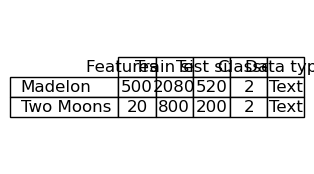

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Define the data for the table as a dictionary

# data only for madelon and "two moons" datasets

data = {
    'Features (D)': [500, 20],
    'Train size' : [2080, 800],
    'Test size' : [520, 200],   
    'Classes' : [2, 2],
    'Data type' : ['Text', 'Text']
}

df = pd.DataFrame(data, index=['Madelon', 'Two Moons'])

# Rendering the DataFrame as a matplotlib table
fig, ax = plt.subplots(figsize=(2, 2))  # set size frame
ax.axis('tight')
ax.axis('off')
the_table = table(ax, df, loc='center', cellLoc='center', colLoc='center')

# Apply font and alignment properties to the table
the_table.auto_set_font_size(False)
the_table.set_fontsize(12)
the_table.scale(1.2, 1.2)

plt.show()
